In [16]:
import desitarget 
from astropy.table import Table
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as U

import numpy as np
import pylab as pl #form of matplotlib
import matplotlib.pyplot as plt
from desitarget.targets import desi_mask, bgs_mask, mws_mask

In [3]:
! ls /global/cfs/cdirs/desi/public/dr1/vac/fastspecfit/guadalupe/v1.0/catalogs

fastphot-guadalupe.fits
fastphot-guadalupe-main-bright.fits
fastphot-guadalupe-main-dark.fits
fastphot-guadalupe-special-bright.fits
fastphot-guadalupe-special-dark.fits
fastspecfit_guadalupe_v1.0_catalogs.sha256sum
fastspec-guadalupe.fits
fastspec-guadalupe-main-bright.fits
fastspec-guadalupe-main-dark.fits
fastspec-guadalupe-special-bright.fits
fastspec-guadalupe-special-dark.fits


In [ ]:
with fits.open('/global/cfs/cdirs/desi/public/dr1/vac/fastspecfit/guadalupe/v1.0/catalogs/fastphot-guadalupe-main-bright.fits') as hdu:
    data1 = Table(hdu[1].data)
    data2 = Table(hdu[2].data)

In [ ]:
data1

TARGETID,SURVEY,PROGRAM,HEALPIX,CONTINUUM_COEFF [16],CONTINUUM_RCHI2,CONTINUUM_AGE,CONTINUUM_AV,CONTINUUM_AV_IVAR,DN4000_MODEL,FLUX_SYNTH_MODEL_G,FLUX_SYNTH_MODEL_R,FLUX_SYNTH_MODEL_Z,FLUX_SYNTH_MODEL_W1,FLUX_SYNTH_MODEL_W2,FLUX_SYNTH_MODEL_W3,FLUX_SYNTH_MODEL_W4,KCORR_U,ABSMAG_U,ABSMAG_IVAR_U,KCORR_B,ABSMAG_B,ABSMAG_IVAR_B,KCORR_V,ABSMAG_V,ABSMAG_IVAR_V,KCORR_SDSS_U,ABSMAG_SDSS_U,ABSMAG_IVAR_SDSS_U,KCORR_SDSS_G,ABSMAG_SDSS_G,ABSMAG_IVAR_SDSS_G,KCORR_SDSS_R,ABSMAG_SDSS_R,ABSMAG_IVAR_SDSS_R,KCORR_SDSS_I,ABSMAG_SDSS_I,ABSMAG_IVAR_SDSS_I,KCORR_SDSS_Z,ABSMAG_SDSS_Z,ABSMAG_IVAR_SDSS_Z,KCORR_W1,ABSMAG_W1,ABSMAG_IVAR_W1,LOGMSTAR,LOGLNU_1500,LOGLNU_2800,LOGL_5100,FOII_3727_CONT,FHBETA_CONT,FOIII_5007_CONT,FHALPHA_CONT
int64,str4,str6,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
2368701667999750,main,bright,10181,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2377104985423872,main,bright,9479,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2377280282165248,main,bright,9628,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2377400943902720,main,bright,15085,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2389323404017665,main,bright,25774,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2389323420794881,main,bright,25773,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2389335349395459,main,bright,26113,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2389335382949893,main,bright,25775,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2389355536580611,main,bright,18954,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data2

TARGETID,SURVEY,PROGRAM,HEALPIX,TILEID_LIST,RA,DEC,COADD_FIBERSTATUS,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,Z,ZWARN,DELTACHI2,SPECTYPE,Z_RR,PHOTSYS,LS_ID,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,EBV,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4
int64,str4,str6,int32,str11,float64,float64,int32,int64,int64,int64,int64,float64,int64,float64,str6,float64,str1,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
2368701667999750,main,bright,10181,20746,260.8449464,57.0242807,0,4611686018427387904,0,0,274877907968,0.9554550704452425,4,0.5744934740359895,GALAXY,0.9554550704452425,S,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028213236,0.9199233,0.94531953,0.96902174,0.9952301,0.997068,0.999374,0.99976355
2377104985423872,main,bright,9479,20912,260.2651,33.738,0,4611686018427387904,0,0,1099511627776,1.0215166009722716,0,2831.449564576149,GALAXY,1.0215166009722716,S,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031436104,0.9111941,0.9392667,0.96554464,0.99468666,0.99673355,0.99930245,0.99973655
2377280282165248,main,bright,9628,20922,256.8889,43.0251,0,4611686018427387904,0,0,1099511627776,1.0224656323916548,0,8640.027814507484,GALAXY,1.0224656323916548,S,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029431121,0.9166149,0.9430276,0.96770626,0.99502474,0.99694157,0.9993469,0.99975336
2377400943902720,main,bright,15085,20894,271.8164,50.2588,0,4611686018427387904,0,0,1099511627776,1.0227471034893134,0,2387.1059160232544,GALAXY,1.0227471034893134,S,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054378506,0.8514017,0.8972841,0.9411504,0.9908268,0.99435645,0.9987937,0.9995443
2389323404017665,main,bright,25774,20573,193.1697990096016,-8.46115859313254,0,4611686018427387904,0,0,8796093022208,0.6120753599426026,4,1.7808557488024235,GALAXY,0.6120753599426026,S,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03454983,0.9028391,0.9334556,0.9621971,0.99416196,0.9964106,0.99923337,0.99971044
2389323420794881,main,bright,25773,20573,194.2052419637823,-8.495187757323357,0,4611686018427387904,0,0,8796093022208,0.915675363293589,4,6.349783268291503,GALAXY,0.915675363293589,S,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033056345,0.9068369,0.93623835,0.9638013,0.9944136,0.9965655,0.9992665,0.99972296
2389335349395459,main,bright,26113,20572,192.03255937518395,-7.98832204021329,0,4611686018427387904,0,0,8796093022208,0.06341801475793736,0,512.1244171112776,GALAXY,0.06341801475793736,S,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03088448,0.9126823,0.9402999,0.9661389,0.99477965,0.9967908,0.99931467,0.9997412
2389335382949893,main,bright,25775,20573,193.8941334000056,-8.05557535932544,0,4611686018427387904,0,0,8796093022208,0.012038889775538925,0,62.28591778140981,GALAXY,0.012038889775538925,S,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03500264,0.9016305,0.93261355,0.9617113,0.99408567,0.99636364,0.99922335,0.9997067
2389355536580611,main,bright,18954,20845,324.3570571681343,-7.1465156649362624,0,4611686018427387904,0,0,8796093022208,0.05252297941620017,0,266.4766075760126,GALAXY,0.05252297941620017,S,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03644668,0.897787,0.9299332,0.9601636,0.9938424,0.9962139,0.99919134,0.9996946


In [ ]:
bgs_bright_i = np.where((data2["BGS_TARGET"] & bgs_mask["BGS_BRIGHT"]) != 0)[0]
bgs_faint_i = np.where((data2["BGS_TARGET"] & bgs_mask["BGS_FAINT"]) != 0)[0]
bgs_i = np.where((data2["DESI_TARGET"] & desi_mask["BGS_ANY"]) != 0)[0]
print(bgs_bright_i, bgs_faint_i, bgs_i)

[    273     276     278 ... 1092031 1092032 1092036] [    272     274     275 ... 1092034 1092035 1092037] [    272     273     274 ... 1092035 1092036 1092037]


1322.037777153394 Mpc
1.1134930486259734e+17


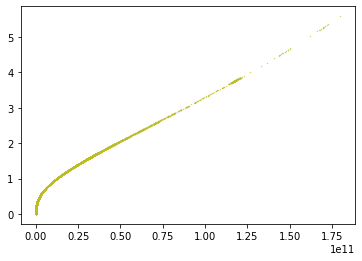

In [25]:
"""def vmax(z):
    return -5.2*np.log10(z)-23"""

def vmax(z):
    z = np.array(z)
    return (cosmo.comoving_distance(z).to_value())**3

#data2['VMAX_EST'] = vmax(data2['Z'])

cosmo = FlatLambdaCDM(H0=100, Om0=0.3) 
print(cosmo.comoving_distance(0.5)) # [Mpc/h]
print(cosmo.lookback_time(0.5).to_value(U.s))
plt.scatter(vmax(data2['Z']), data2['Z'], s=0.1, color='tab:olive')


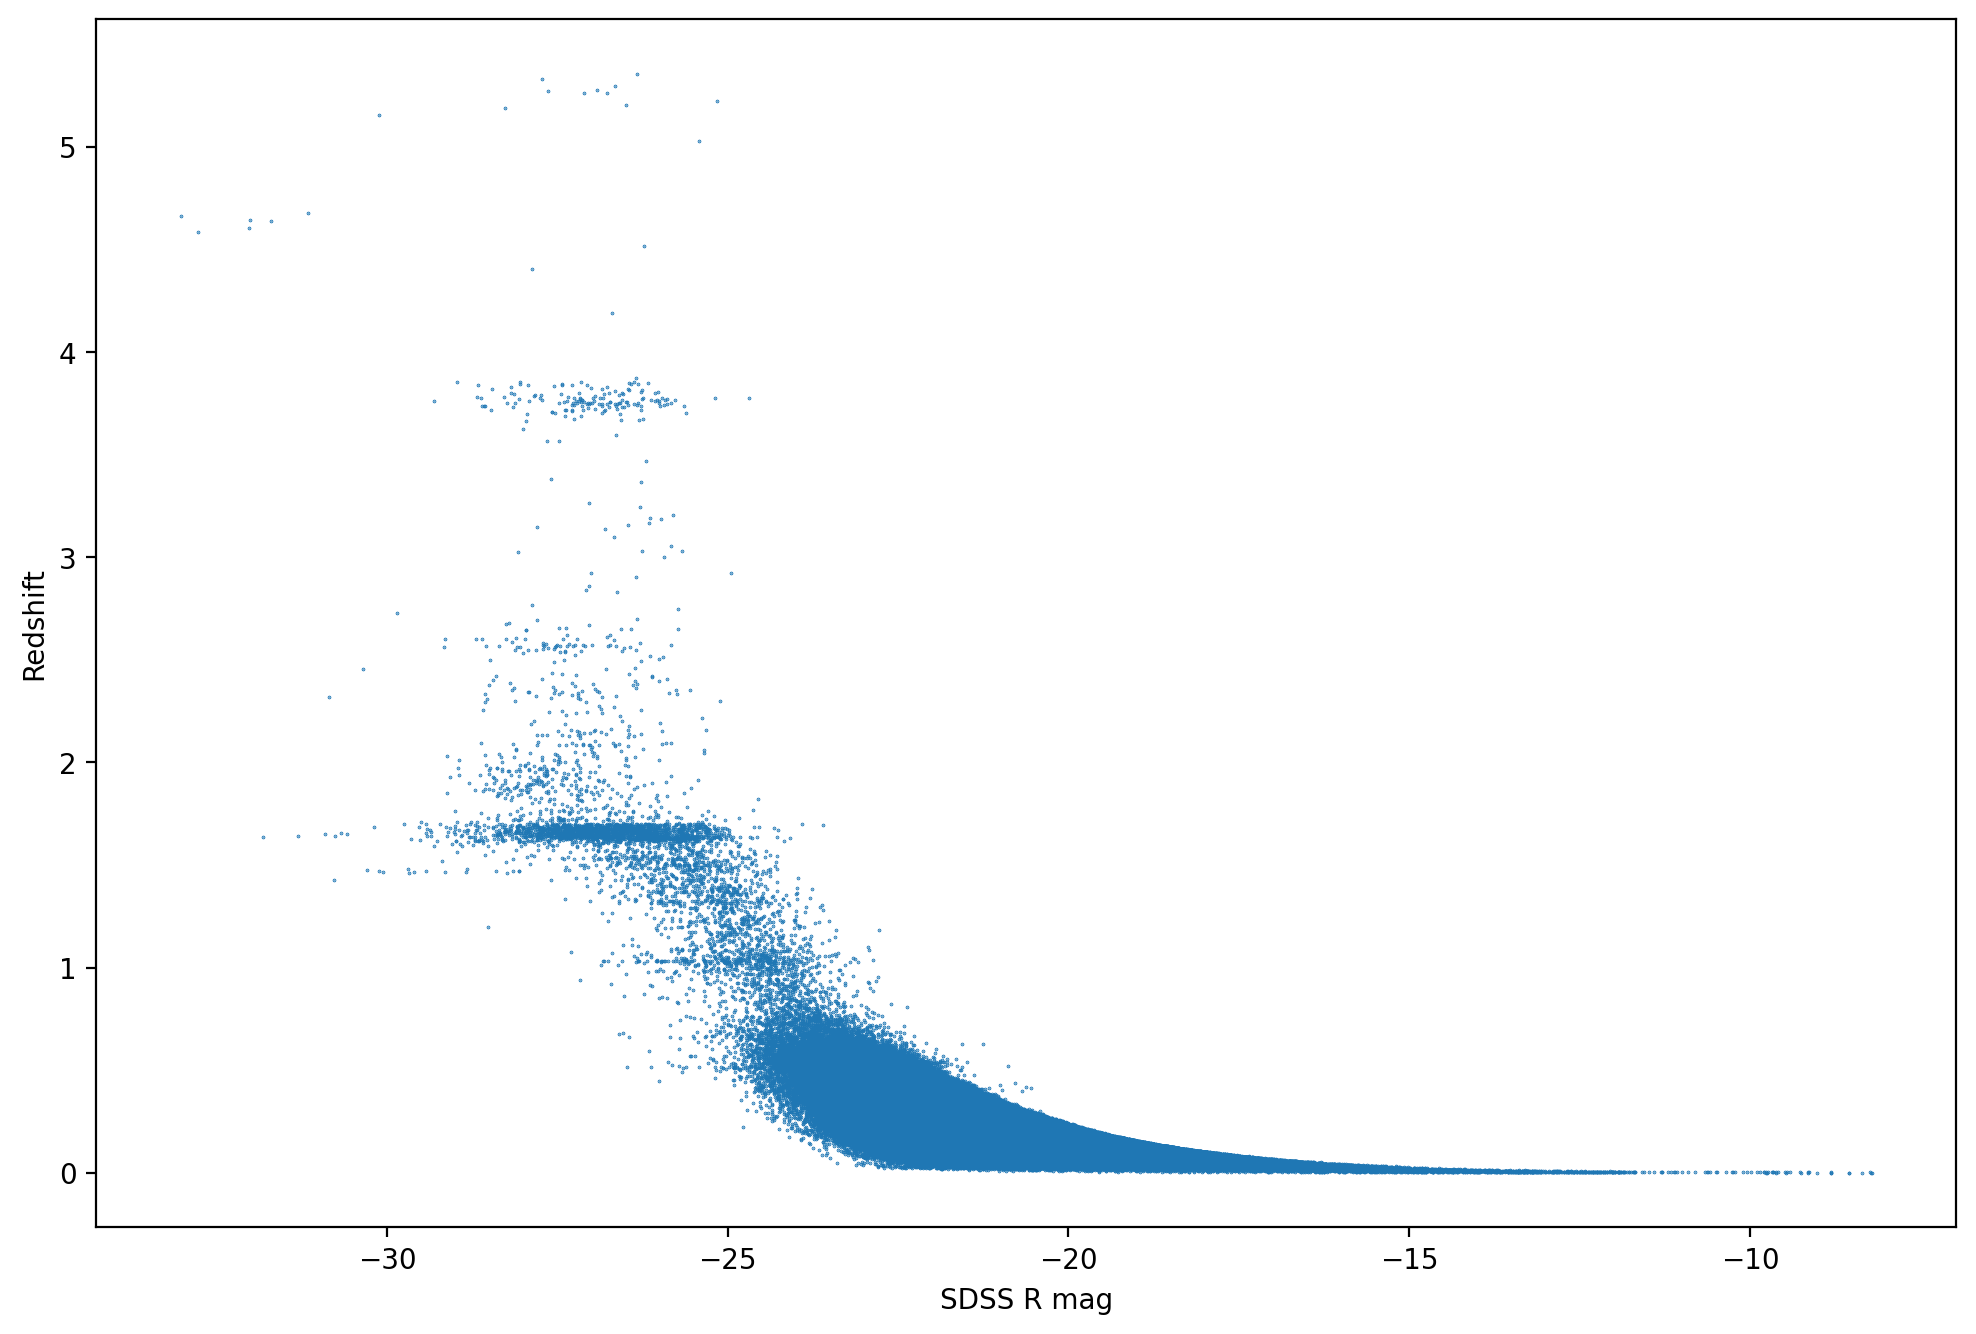

In [33]:
fig, ax = plt.subplots(figsize=(12,8), dpi=200)
ax.scatter(data1['ABSMAG_SDSS_R'][bgs_bright_i], data2['Z'][bgs_bright_i], s=0.1)
ax.scatter(data1['ABSMAG_SDSS_R'][bgs_faint_i], data2['Z'][bgs_faint_i], s=0.1, color='tab:blue')
#ax.set_yscale('log')
plt.xlabel('SDSS R mag')
plt.ylabel('Redshift')
#ax.plot(data2['VMAX_EST'], data2['Z'], color='tab:olive')

plt.savefig('figures/absmag_r.png')

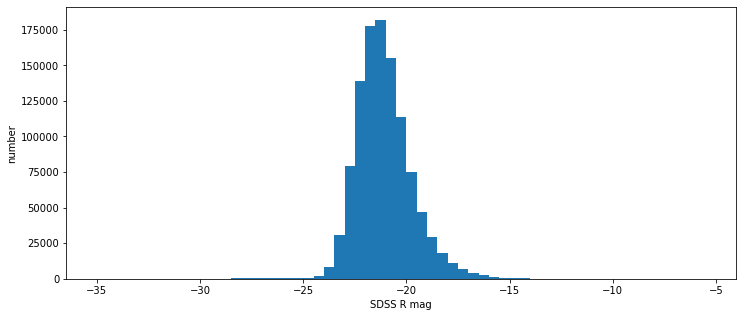

In [30]:
plt.figure(figsize=(12,5))
plt.hist(data1['ABSMAG_SDSS_R'][bgs_i], bins=np.arange(-35,-5,0.5))
plt.xlabel('SDSS R mag')
plt.ylabel('number')
plt.show()

In [31]:
plt.figure(figsize=(12,5))
plt.hist(data1['ABSMAG_SDSS_R'][bgs_i], bins=np.arange(-35,-5,0.5), weights=1/data2['VMAX_EST'][bgs_i])
plt.xlabel('SDSS R mag')
plt.ylabel('number')
plt.show()

KeyError: 'VMAX_EST'

<Figure size 864x360 with 0 Axes>

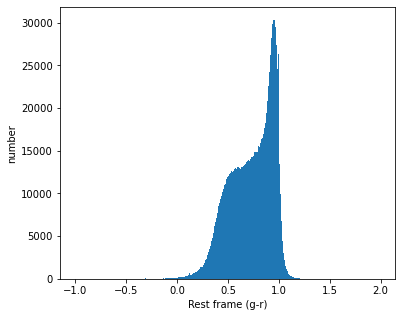

In [29]:
rest_g_r = data1['ABSMAG_SDSS_G'] - data1['ABSMAG_SDSS_R']

plt.figure(figsize=(6,5))
plt.hist(rest_g_r[bgs_i], bins=np.arange(-1,2,0.01))
plt.xlabel('Rest frame (g-r)')
plt.ylabel('number')
plt.show()